<a href="https://colab.research.google.com/github/BrambilaAyala/Imagenes_Filtros/blob/main/Tarea_2_Villa_Octubre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equipo:

Miguel Angel Cruz Duarte.

Leonardo Brambila Ayala.

Gabriela Aydee Miranda.

José Alfredo Vera

In [ ]:
!wget -O bird2.jpg "https://raw.githubusercontent.com/hvilla17/DIP-2025/main/images/bird2.jpg"

--2025-10-01 21:49:21--  https://raw.githubusercontent.com/hvilla17/DIP-2025/main/images/bird2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24252 (24K) [image/jpeg]
Saving to: ‘bird2.jpg’

bird2.jpg           100%[===================>]  23.68K  --.-KB/s    in 0.001s  

2025-10-01 21:49:21 (20.0 MB/s) - ‘bird2.jpg’ saved [24252/24252]



Se ha generado la comparación de filtros en 'comparacion_filtros.png'.


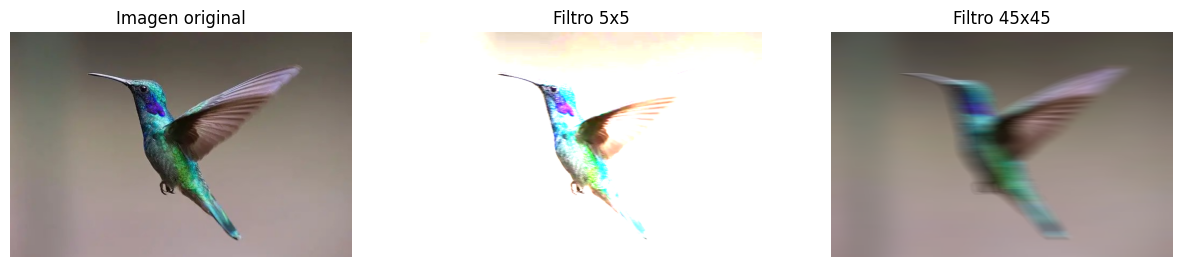

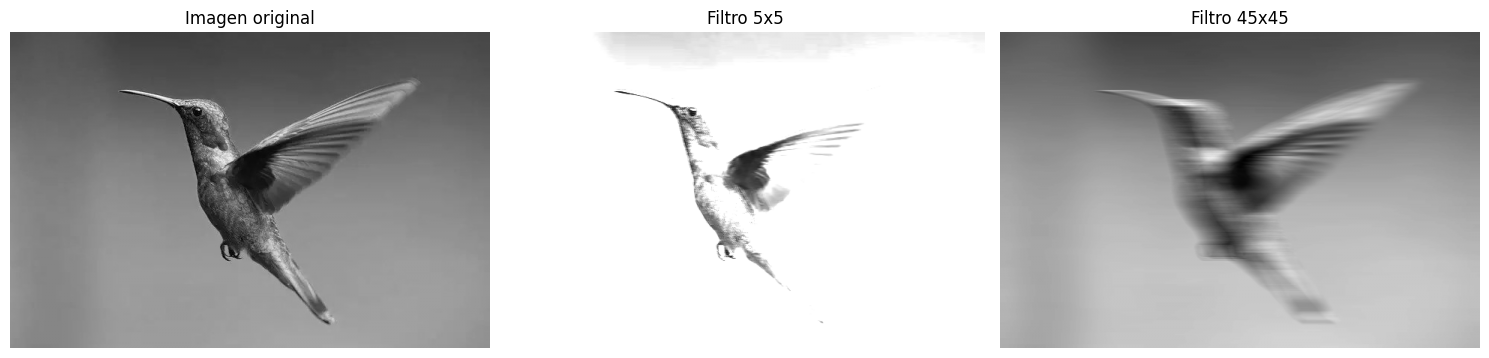

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = cv2.imread("bird2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#filtro 5x5
filter_5x5 = np.zeros((5, 5), dtype=np.float32)
filter_5x5[2] = [1, 1/5, 1, 1, 1/5]

#filtro 45x45
filter_45x45 = np.zeros((45, 45), dtype=np.float32)
filter_45x45[22] = np.ones(45, dtype=np.float32) / 45

#aplicar filtros
filtered_5x5 = cv2.filter2D(image, -1, filter_5x5)
filtered_45x45 = cv2.filter2D(image, -1, filter_45x45)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title("Imagen original")
axs[0].axis("off")

axs[1].imshow(filtered_5x5)
axs[1].set_title("Filtro 5x5")
axs[1].axis("off")

axs[2].imshow(filtered_45x45)
axs[2].set_title("Filtro 45x45")
axs[2].axis("off")


#aplicar filtros
filtered_5x5_2 = cv2.filter2D(image_gray, -1, filter_5x5)
filtered_45x45_2 = cv2.filter2D(image_gray, -1, filter_45x45)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image_gray, cmap='gray')
axs[0].set_title("Imagen original")
axs[0].axis("off")

axs[1].imshow(filtered_5x5_2, cmap ='gray')
axs[1].set_title("Filtro 5x5")
axs[1].axis("off")

axs[2].imshow(filtered_45x45_2, cmap ='gray')
axs[2].set_title("Filtro 45x45")
axs[2].axis("off")

plt.tight_layout()
plt.savefig("comparacion_filtros.png")
print("Se ha generado la comparación de filtros en 'comparacion_filtros.png'.")

# Filtro 1

Es un filtro que tomo como promedio horizontal, con los 5 pixeles centrales o de 45 pixeles, los valores centrales de la matriz, es un filtro que suaviza en una linea horizontal, el objetivo de est filtro es demostrar el desonfoque horizontal del filtro

* Para el filtro de 5x5, suavia una recta horizontal de 5 pixeles, este genera un desenfoque horizontal prqueño.

* Para el filtro de 45x45, es similar al filtro de 5x5, solo que el desenfoque es mas grandes

In [ ]:
!wget -O lena.jpg "https://raw.githubusercontent.com/hvilla17/DIP-2025/main/images/Tree_Rings.jpg"

--2025-10-01 21:49:23--  https://raw.githubusercontent.com/hvilla17/DIP-2025/main/images/Tree_Rings.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104661 (102K) [image/jpeg]
Saving to: ‘lena.jpg’

lena.jpg            100%[===================>] 102.21K  --.-KB/s    in 0.01s   

2025-10-01 21:49:23 (9.14 MB/s) - ‘lena.jpg’ saved [104661/104661]



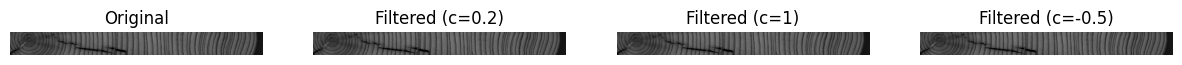

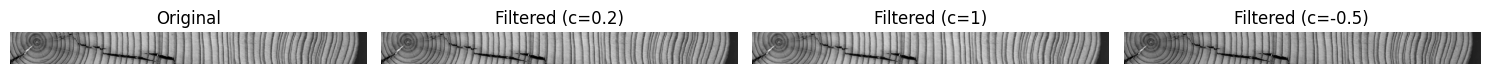

In [ ]:
#Matriz de 4x3
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "lena.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the filter function
def create_filter(c):
    kernel = np.array([
        [0, c/4, 0],
        [c/4, 1 - c, c/4],
        [0, c/4, 0]
    ], dtype=np.float32)
    return kernel

# Apply the filter for different values of c
c_values = [0.2, 1, -0.5]
filtered_images = []

for c in c_values:
    kernel = create_filter(c)
    filtered = cv2.filter2D(image_rgb, -1, kernel)
    filtered_images.append((c, filtered))

# Plot the original and filtered images
plt.figure(figsize=(15, 5))
plt.subplot(1, len(c_values) + 1, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

for i, (c, img) in enumerate(filtered_images):
    plt.subplot(1, len(c_values) + 1, i + 2)
    plt.imshow(img)
    plt.title(f"Filtered (c={c})")
    plt.axis("off")

filtered_images_gray = []
for c in c_values:
    kernel = create_filter(c)
    filtered = cv2.filter2D(image_gray, -1, kernel)
    filtered_images_gray.append((c, filtered))

# Plot the original and filtered images
plt.figure(figsize=(15, 5))
plt.subplot(1, len(c_values) + 1, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original")
plt.axis("off")

for i, (c, img) in enumerate(filtered_images_gray):
    plt.subplot(1, len(c_values) + 1, i + 2)
    plt.imshow(img, cmap='gray')
    plt.title(f"Filtered (c={c})")
    plt.axis("off")

plt.tight_layout()
plt.savefig("filtered_comparison.png")
plt.show()

# Filtro 2

Este filtro, puede tener, tener varias utilidades, como actuar como una identidad, deteccion de bordes o realsar, dependiendo del parametro 'c'.

Es un filtro controlado por el parametro 'c', que puede ser un filtro de realce o de suavizado dependiendo del uso e implementacion, aunque el filtro no es tan vistozo, ya que es un suavizado de imagenes, por lo tanto lo que hace es aclarar o oscurecer ciertas areas de las imagenes.

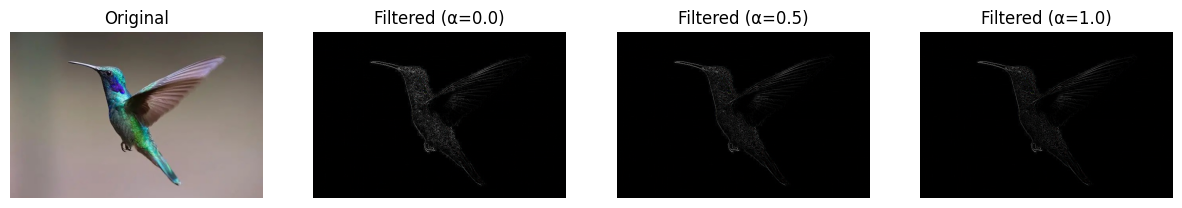

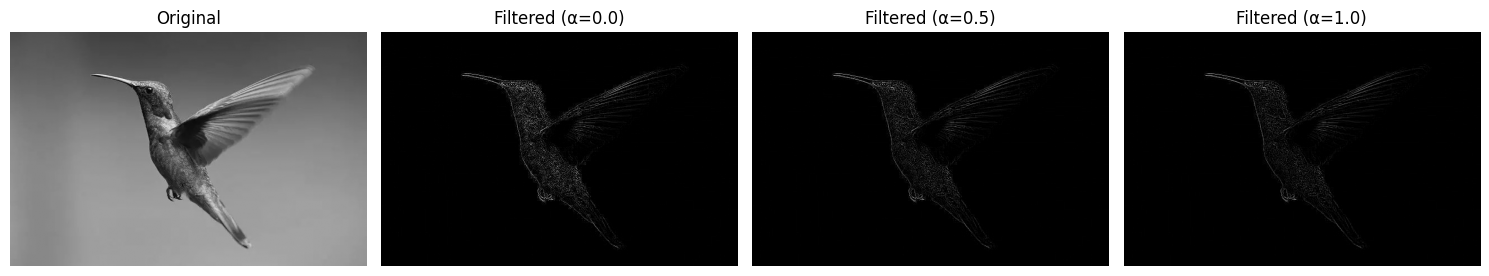

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "bird2.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the filter function based on alpha
def create_filter(alpha):
    base_matrix = np.array([
        [alpha/4, (1 - alpha)/4, alpha/4],
        [(1 - alpha)/4, -1, (1 - alpha)/4],
        [alpha/4, (1 - alpha)/4, alpha/4]
    ])
    scale = 4 / (alpha + 1)
    return scale * base_matrix

# Apply the filter for different alpha values
alpha_values = [0.0, 0.5, 1.0]
filtered_images = []

for alpha in alpha_values:
    kernel = create_filter(alpha)
    filtered = cv2.filter2D(image_rgb, -1, kernel)
    filtered_images.append((alpha, filtered))

plt.figure(figsize=(15, 5))
plt.subplot(1, len(alpha_values) + 1, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

for i, (alpha, img) in enumerate(filtered_images):
    plt.subplot(1, len(alpha_values) + 1, i + 2)
    plt.imshow(img)
    plt.title(f"Filtered (α={alpha})")
    plt.axis("off")
#####
filtered_images_gray = []

for alpha in alpha_values:
    kernel = create_filter(alpha)
    filtered = cv2.filter2D(image_gray, -1, kernel)
    filtered_images_gray.append((alpha, filtered))

plt.figure(figsize=(15, 5))
plt.subplot(1, len(alpha_values) + 1, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original")
plt.axis("off")

for i, (alpha, img) in enumerate(filtered_images_gray):
    plt.subplot(1, len(alpha_values) + 1, i + 2)
    plt.imshow(img, cmap='gray')
    plt.title(f"Filtered (α={alpha})")
    plt.axis("off")

plt.tight_layout()
plt.savefig("filtered2_comparison.png")
plt.show()

# Filtro 3

Este filtro tiene un factor de escala 4÷α+1, este es un facttor que se ajusta a la ganacia global de;l filtro.

Este filtro se centra en resaltar las difetencias de cada pixel, ya como esta conformada la matriz, se puede ver que es un filtro de deteccion de bordes verticales y horizontales, que seria un filtro de deteccion de bordes parametrico.

Controla en que direccion de bordes debe de resaltar por el parametro α.

In [ ]:
!wget -O circulo.png "https://raw.githubusercontent.com/BrambilaAyala/Imagenes_Filtros/main/generated_image.png"

--2025-10-01 21:49:27--  https://raw.githubusercontent.com/BrambilaAyala/Imagenes_Filtros/main/generated_image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1158 (1.1K) [image/png]
Saving to: ‘circulo.png’

circulo.png         100%[===================>]   1.13K  --.-KB/s    in 0s      

2025-10-01 21:49:27 (101 MB/s) - ‘circulo.png’ saved [1158/1158]



In [ ]:
!wget -O cc_color.png "https://raw.githubusercontent.com/BrambilaAyala/Imagenes_Filtros/main/generated_image_color.png"

--2025-10-01 21:49:27--  https://raw.githubusercontent.com/BrambilaAyala/Imagenes_Filtros/main/generated_image_color.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2236 (2.2K) [image/png]
Saving to: ‘cc_color.png’

cc_color.png        100%[===================>]   2.18K  --.-KB/s    in 0s      

2025-10-01 21:49:27 (25.3 MB/s) - ‘cc_color.png’ saved [2236/2236]



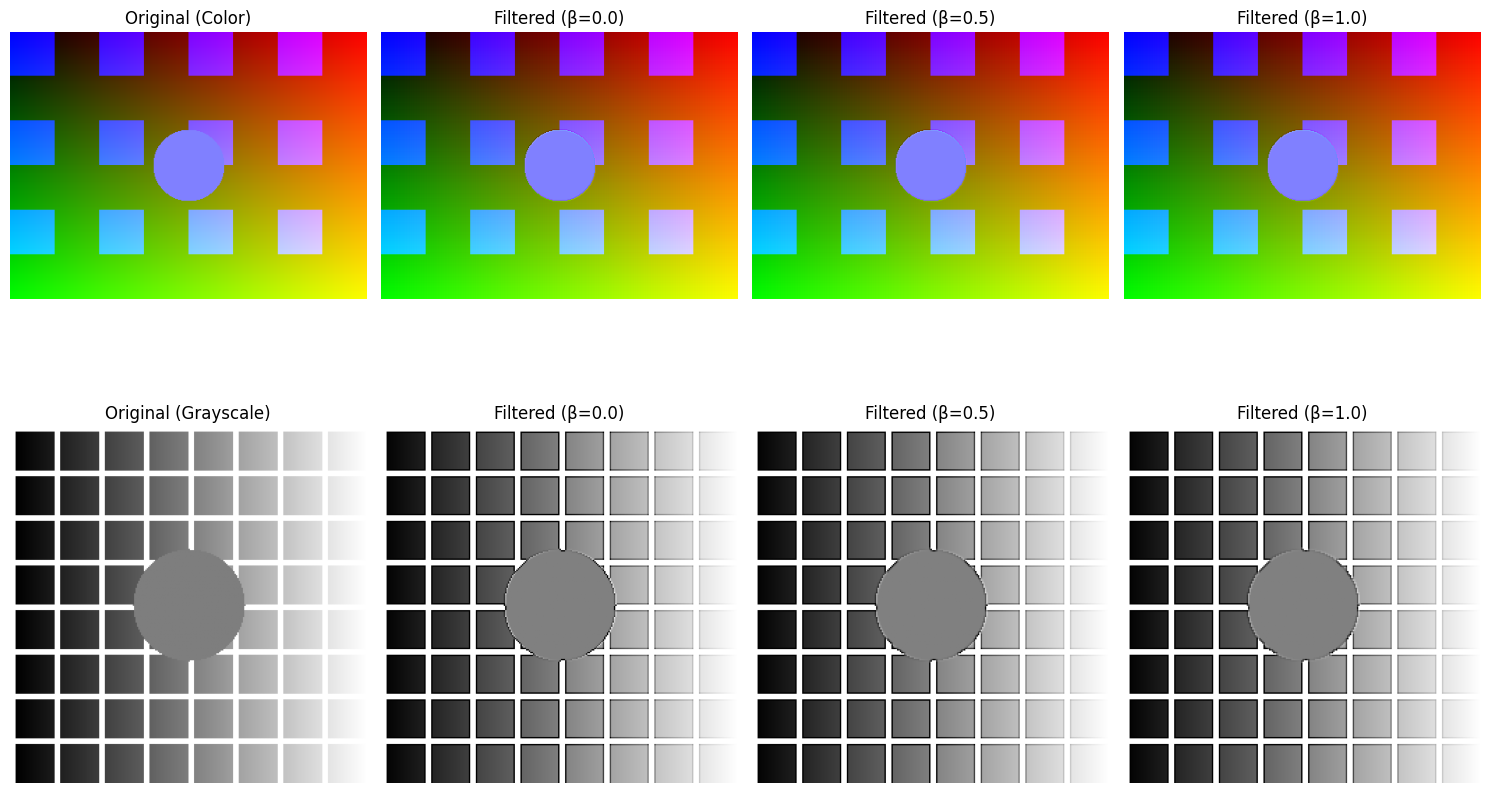

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
color_image_path = "cc_color.png"
color_image = cv2.imread(color_image_path, cv2.IMREAD_COLOR)
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Load the grayscale image
gray_image_path = "circulo.png"
gray_image = cv2.imread(gray_image_path, cv2.IMREAD_GRAYSCALE)

# Define the filter function based on beta
def create_filter(beta):
    base_matrix = np.array([
        [-beta, beta - 1, -beta],
        [beta - 1, beta + 5, beta - 1],
        [-beta, beta - 1, -beta]
    ])
    scale = 1 / (beta + 1)
    return scale * base_matrix

# Apply the filter for different beta values
beta_values = [0.0, 0.5, 1.0]
filtered_color_images = []
filtered_gray_images = []

for beta in beta_values:
    kernel = create_filter(beta)
    filtered_color = cv2.filter2D(color_image_rgb, -1, kernel)
    filtered_gray = cv2.filter2D(gray_image, -1, kernel)
    filtered_color_images.append((beta, filtered_color))
    filtered_gray_images.append((beta, filtered_gray))

# Plot the original and filtered images
plt.figure(figsize=(15, 10))

# Show original color image
plt.subplot(2, len(beta_values) + 1, 1)
plt.imshow(color_image_rgb)
plt.title("Original (Color)")
plt.axis("off")

# Show original grayscale image
plt.subplot(2, len(beta_values) + 1, len(beta_values) + 2)
plt.imshow(gray_image, cmap="gray")
plt.title("Original (Grayscale)")
plt.axis("off")

# Show filtered color images
for i, (beta, img) in enumerate(filtered_color_images):
    plt.subplot(2, len(beta_values) + 1, i + 2)
    plt.imshow(img)
    plt.title(f"Filtered (β={beta})")
    plt.axis("off")

# Show filtered grayscale images
for i, (beta, img) in enumerate(filtered_gray_images):
    plt.subplot(2, len(beta_values) + 1, len(beta_values) + 3 + i)
    plt.imshow(img, cmap="gray")
    plt.title(f"Filtered (β={beta})")
    plt.axis("off")

plt.tight_layout()
plt.savefig("filtered_comparison_beta.png")
plt.show()

# Filtro 4

Es un filtro espacial diseñado para realzar detalles y resaltar bordes en una imagen, con un comportamiento ajustable mediante el parámetro $β ∈ [0,1]$.

Este filtro resalta los bordes y detalles se detectan mejor cuando hay una gran diferencia entre el centro y sus vecinos.

Este filtro resalta esas diferencias, por eso es útil para:

* Mejorar nitidez.
* Detectar contornos.
* Resaltar texturas.

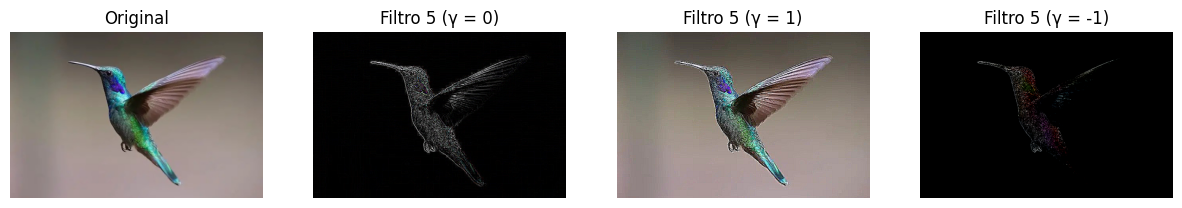

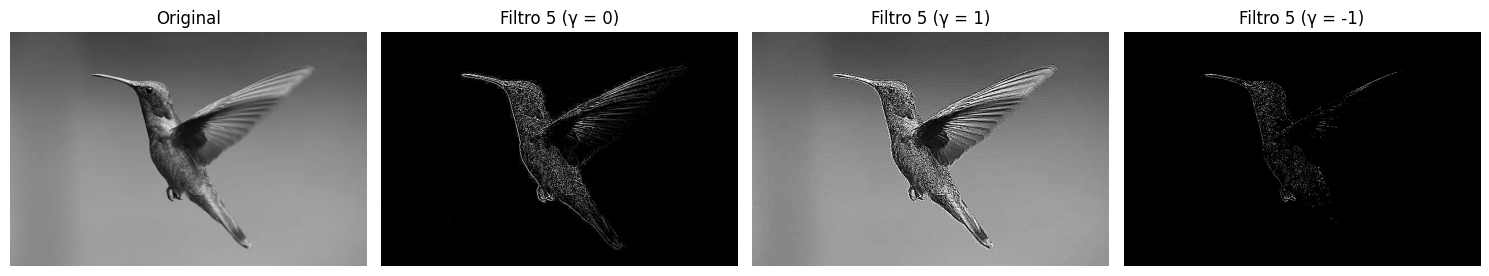

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("bird2.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the function to apply Filtro 5
def apply_filtro5(img, gamma):
    kernel = np.array([
        [-1, -1, -1],
        [-1, gamma + 8, -1],
        [-1, -1, -1]
    ])
    filtered_img = cv2.filter2D(img, -1, kernel)
    return filtered_img

# Define gamma values to test
gamma_values = [0, 1, -1]

# Apply the filter for each gamma and store results
results = [apply_filtro5(image_rgb, gamma) for gamma in gamma_values]

# Plot the original and filtered images
fig, axes = plt.subplots(1, len(gamma_values) + 1, figsize=(15, 5))
axes[0].imshow(image_rgb)
axes[0].set_title("Original")
axes[0].axis("off")

for i, gamma in enumerate(gamma_values):
    axes[i + 1].imshow(results[i])
    axes[i + 1].set_title(f"Filtro 5 (γ = {gamma})")
    axes[i + 1].axis("off")


# Apply the filter for each gamma and store results
results = [apply_filtro5(image_gray, gamma) for gamma in gamma_values]

# Plot the original and filtered images
fig, axes = plt.subplots(1, len(gamma_values) + 1, figsize=(15, 5))
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Original")
axes[0].axis("off")

for i, gamma in enumerate(gamma_values):
    axes[i + 1].imshow(results[i], cmap='gray')
    axes[i + 1].set_title(f"Filtro 5 (γ = {gamma})")
    axes[i + 1].axis("off")

plt.tight_layout()
plt.savefig("filtro5_comparacion.png")
plt.show()

# Filtro 5

Este es un filtro espacial 3x3 diseñado para realzar bordes y detalles en una imagen. Su comportamiento depende de un parámetro ajustable γ, que puede ser positivo o negativo.

Este filtro resalta las diferencias del pixel cerntral y su entorno, detecta bordes en todas las direcciones, ya que los vecinos tiene el valor de $-1$, eso quiere decir que responde a los bordes horizontales, verticales y los diagonales de la misma manera.

Esste filtro seria un filtro que detecta bordes al comparar su centro con todos los pixeles de su alrededor.